##House classification-Luxury or Basic


This is a set of data created from house prices in an urban environment - Paris.
Dataset consists of 18 columns and 10001 rows. All of the features are numerical values.


Features

All attributes are numeric variables and they are listed bellow:

squareMeters

numberOfRooms

hasYard

hasPool

floors : number of floors


cityCode : zip code

cityPartRange : the higher the range, the more exclusive the neighbourhood is

numPrevOwners : number of prevoious owners

made : year

isNewBuilt

hasStormProtector

basement : basement square meters

attic : attic square meteres

garage : garage size

hasStorageRoom

hasGuestRoom : number of guest rooms

price : price of a house

category : Luxury or Basic

Our task is to classified the 'category' of a house on the basis of feacture variable

* I am going to read the data and other information about the dataset<br>
then Data preprocessing and visualization

* In data preprocessing, I am going to count the target variable which is a category(basic and luxury). I will change it into numeric and split the total number of category values into equal counts(50-50).

* In the Data visualization part, I will analyze how does target variable changes with the independent features.  I will see the correlation and analyze the correlated column. how if independent features increased and what impact or change occurs on the target variable

* In the Data cleaning part, if the outlier is present then I will remove the outlier and add or remove data according to need. I will remove or drop columns that are not correlated

* I will hand the imbalanced data by undersampling the majority class

* I am going to use three models that are Logistic Regression, RandomForestClassifier, KNeighborsClassifier to see clear differences and analysis which models work perfectly according our datasets



In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ParisHousingClass.csv to ParisHousingClass (3).csv


In [ ]:
#Reading file
housing = pd.read_csv("ParisHousingClass.csv")

In [ ]:
df2 = housing.copy()  # Making a copy of the data frame
# Now, we can freely edit the copy without loss of original data

In [ ]:
# Taking a look at the data
housing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [ ]:
# Checking data types and some info
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

There seems to be no nulls

In [ ]:
df2.isnull().sum() # Searching for nulls


squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

We can see that there are no nulls

#Data preprocessing & Visualization

In [ ]:
# counting the value present in category
housing['category'].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

In [ ]:
# Changing to numeric type
df2['category'].replace("Basic", 0 , inplace = True)
df2['category'].replace("Luxury", 1 , inplace = True)


In [ ]:
# Checking data types and some info
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

* All data is of numeric type

In [ ]:
# Checking for duplicates
df2.duplicated().sum()



0

No duplicates found

In [ ]:
# Getting more insight on data
df2.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06,0.126500
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06,0.332429
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04,0.000000
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06,0.000000
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06,0.000000
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06,0.000000
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07,1.000000


* Here, i have find or knowing what data is saying
* The total number of values in a column is called the count.
  The mean of a column is its mean.
* std is the column's standard deviation, which indicates how spread  the  values are.
* The standard deviation is the square root of the variance, which is the average of the squared deviation from the mean, and is commonly symbolized by (the Greek letter sigma). When a feature's normal distribution is bell-shaped (also called a Gaussian distribution).

* In a given column, min is the lowest number and max is the highest value.
* The corresponding percentiles are shown in the 25 percent, 50 percent, and 75 percent rows: A percentile is a figure below which a certain percentage of observations in a collection of observations fall.

* we can see in squaremeter coloumn here min value which is 89 which donot make sense we saw it in data cleaning part and max value is 99999

In [ ]:
# for corelation
corr_matrix = housing.corr()
print(corr_matrix)


                   squareMeters  numberOfRooms  ...  hasGuestRoom     price
squareMeters           1.000000       0.009573  ...     -0.000623  0.999999
numberOfRooms          0.009573       1.000000  ...     -0.015529  0.009591
hasYard               -0.006650      -0.011240  ...     -0.007276 -0.006119
hasPool               -0.005594       0.017015  ...      0.001123 -0.005070
floors                 0.001109       0.022244  ...     -0.021155  0.001654
cityCode              -0.001541       0.009040  ...     -0.003338 -0.001539
cityPartRange          0.008758       0.008340  ...     -0.007153  0.008813
numPrevOwners          0.016619       0.016766  ...     -0.006082  0.016619
made                  -0.007207       0.003978  ...     -0.005431 -0.007210
isNewBuilt            -0.010667      -0.002865  ...      0.019895 -0.010643
hasStormProtector      0.007480      -0.001656  ...     -0.006549  0.007496
basement              -0.003960      -0.013990  ...     -0.020732 -0.003967
attic       

* A correlation heatmap uses colored cells, typically in a monochromatic scale to show a 2D correlation matrix (table) between two discreate or event type. it is very important in feacture selection

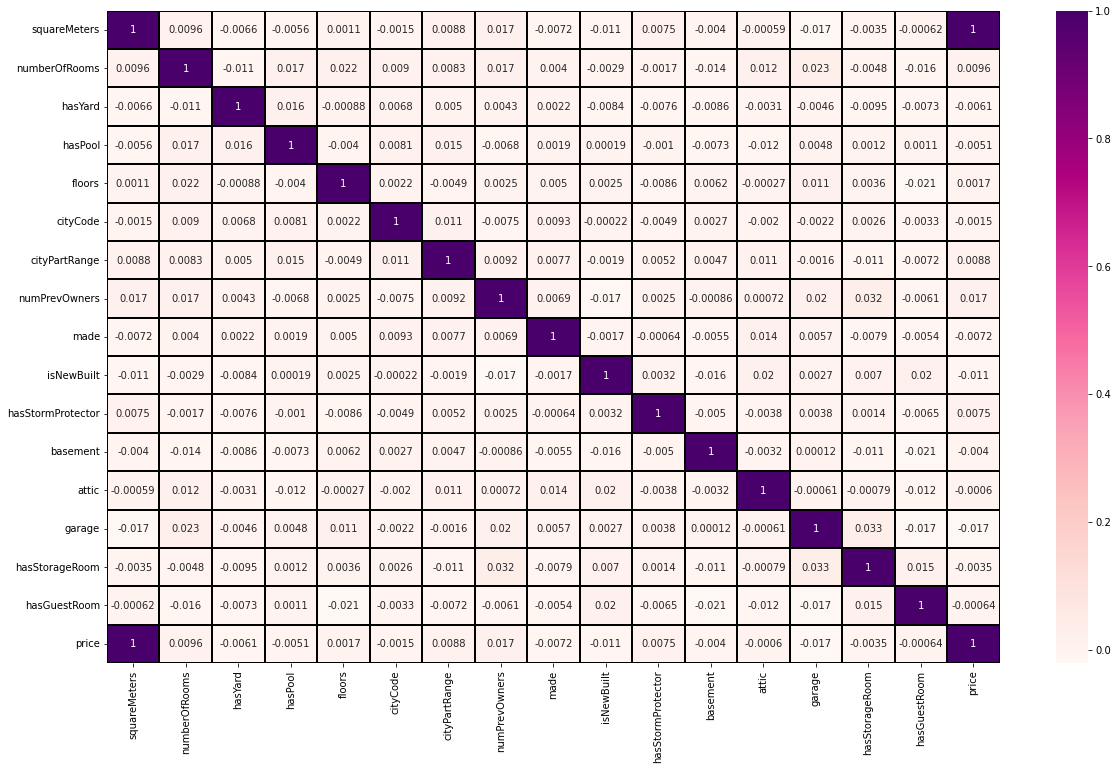

In [ ]:
# for corelation
plt.figure(figsize=(20,12))
sns.heatmap(housing.corr(), cbar = True,annot = True, cmap='RdPu', linewidths=1, linecolor='black')

* The correlation coefficient might be anywhere between –1 and 1. When it's close to 1, it suggests there's a significant positive relationship; for example, when the squaremeter rises, the numberoRoom value rises as well. When the coefficient is close to –1, a strong negative connection is present. There is no linear link if the coefficients are close to zero.

Important features are (HAS YARD , HAS POOL , IS NEW BUILT )
Target( luxury or basic is correlated to hasYard, hasPool and isnewBuilt)
There is a stong correlation between price and squareMeters. so, we decided to drop squareMeter to apply the model

We notice a few key points here, which will be the main basis of our project

1- category's three strongest correlations are with: hasYard, hasPool, isNewBuilt so we will check for more info about those three specifically.

2- SquareMeters and Price are 100% correlated, so we should drop one of them.

3- Most features are weakly correlated.

In [ ]:
# Initializing some variables with colours, this makes it
# easier in case we want to change the colour mid-project.
background_color = 'lightcoral'
graph_color = 'mistyrose'

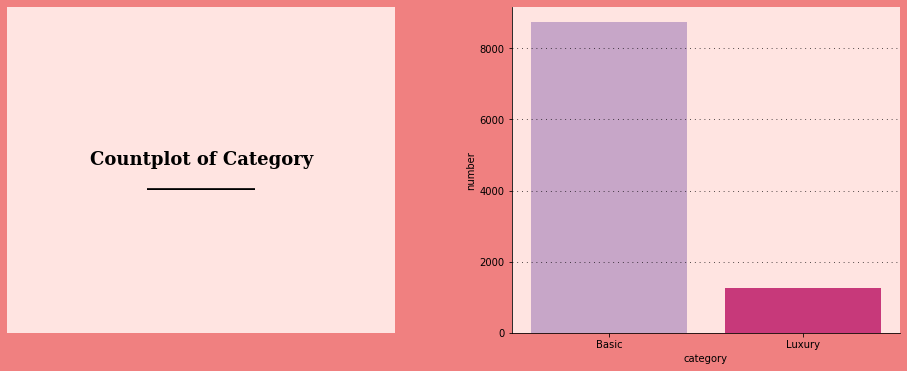

In [ ]:
fig = plt.figure(figsize=(16, 6))  # the figure size
ad = fig.add_gridspec(1, 2)        # making 2 grids (1 row, 2 columns)
ad.update(wspace=0.3)              # Changing this would change the width of graphs, and might

ax0 = fig.add_subplot(ad[0, 0])    # assigning a variable fo each grid
ax1 = fig.add_subplot(ad[0, 1])    # to be able to change each graph independently

axes = [ax0, ax1]                  # putting them in a list, to change the graph colour easily
fig.patch.set_facecolor(background_color) # Setting the background colours for the wall behind the graphs

# Title
ax0.text(0.5, 0.5, 'Countplot of Category\n____________',   # determining the coordinates of the title
        horizontalalignment='center',
        verticalalignment='center',                         # determining the alignment
        fontsize=18, fontfamily='serif', fontweight='bold', color='black')
# determining the font size, type, weight, and colour (the default colour
# is black so we needn't have wrote it)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Setting the labels (we chose to leave them empty)

ax0.tick_params(left=False, bottom=False)    # Removes the marking points at the axes of a graph
for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
# a for loop that removes the lines enclosing a graph
# Graph
sns.countplot(x='category', data=housing,  ax=ax1, palette='PuRd') # shows numbers of each category
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
# axis: whether to draw the dotted lines vertically or horizontally
# zorder: which drawn figure gets put on top
# dashes: the distance between dots

ax1.set_xlabel('category') # Setting X-label
ax1.set_ylabel('number')   # Setting Y-label
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)
# a for loop that removes the top and right lines enclosing the graph
# Settings
for ax in axes:
    ax.set_facecolor(graph_color)
# Changing the colour of the graph itself, not the background

we drew a pie chart to check for percentages as well

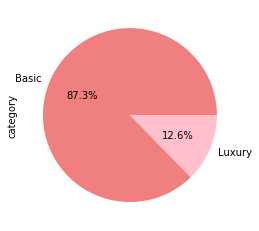

In [ ]:

round(housing['category'].value_counts()/housing.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'pink'])

We can see that Basic category is much more common than the luxurious one


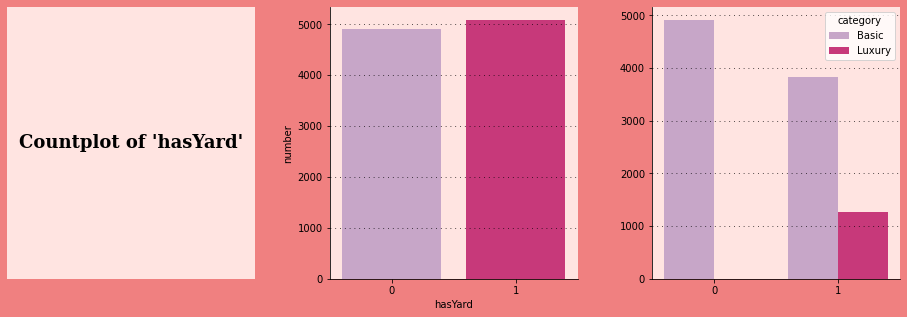

In [ ]:
fig = plt.figure(figsize=(16, 5))  # the figure size
ad = fig.add_gridspec(1, 3)        # making 3 grids (1 row, 3 columns)
ad.update(hspace=0.2, wspace=0.3)  # Changing the wspace would change the width of graphs, and might
ax0 = fig.add_subplot(ad[0, 0])    # assigning a variable fo each grid
ax1 = fig.add_subplot(ad[0, 1])
ax2 = fig.add_subplot(ad[0, 2])

axes = [ax0, ax1, ax2]             # putting them in a list, to change the graph colour easily
fig.patch.set_facecolor(background_color) # Setting the background colours for the wall behind the graphs

# Title
ax0.text(0.5, 0.5, "Countplot of 'hasYard'",  # determining the coordinates of the title
        horizontalalignment='center',
        verticalalignment='center',                         # determining the alignment
        fontsize=18, fontweight='bold', fontfamily='serif')
# determining the font size, type, weight, and colour
ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Setting the labels (we chose to leave them empty)
ax0.tick_params(left=False, bottom=False)    # Removes the marking points at the axes of a graph
for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
# a for loop that removes the lines enclosing a graph
# Graph1
sns.countplot(x='hasYard', data=housing, ax=ax1, palette='PuRd') # shows numbers of each category
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))

ax1.set_xlabel('hasYard')  # Setting X-label
ax1.set_ylabel('number')   # Setting Y-label
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)
# Graph2
# Drawing the hasYard feature against the category feature
sns.countplot(x='hasYard', data=housing, hue='category', ax=ax2, palette='PuRd')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)
# Settings
for ax in axes:
    ax.set_facecolor(graph_color)


In [ ]:
# A table showing the numbers of basic houses that have yards, and those that don't
# and also the luxurious houses that have yards, and those that don't
pd.crosstab(housing['category'], housing['hasYard'], margins=True).style.background_gradient(cmap="Blues")

hasYard,0,1,All
category,,,
Basic,4913,3822,8735
Luxury,0,1265,1265
All,4913,5087,10000


We notice that all luxurious apartments must have yards, but not all apartments with yards are luxuriou

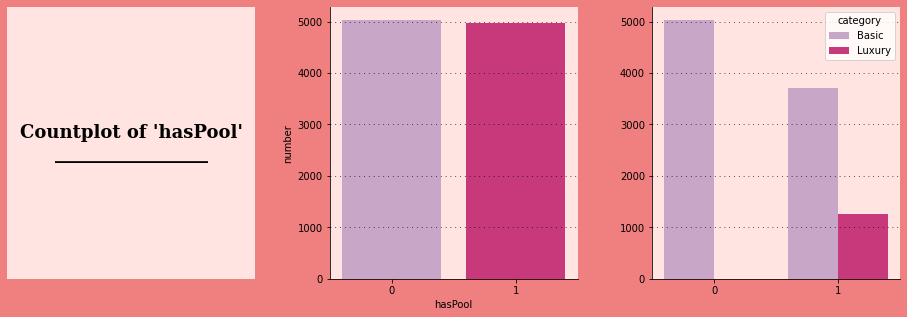

In [ ]:
fig = plt.figure(figsize=(16, 5))  # the figure size
gs = fig.add_gridspec(1, 3)        # making 3 grids (1 row, 3 columns)
gs.update(hspace=0.2, wspace=0.3)  # Changing the wspace would change the width of graphs, and might

ax0 = fig.add_subplot(gs[0, 0])    # assigning a variable fo each grid
ax1 = fig.add_subplot(gs[0, 1])    # to be able to change each graph independently
ax2 = fig.add_subplot(gs[0, 2])

axes = [ax0, ax1, ax2]             # putting them in a list, to change the graph colour easily
fig.patch.set_facecolor(background_color) # Setting the background colours for the wall behind the graphs
# Title
ax0.text(0.5, 0.5, "Countplot of 'hasPool'\n_________________",  # determining the coordinates of the title
        horizontalalignment='center',
        verticalalignment='center',                         # determining the alignment
        fontsize=18, fontweight='bold', fontfamily='serif')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Setting the labels (we chose to leave them empty)
ax0.tick_params(left=False, bottom=False)    # Removes the marking points at the axes of a graph
for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
# a for loop that removes the lines enclosing a graph
# Graph1
sns.countplot(x='hasPool', data=housing, ax=ax1, palette='PuRd') # shows numbers of each category
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('hasPool')  # Setting X-label
ax1.set_ylabel('number')   # Setting Y-label
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)

# Graph2
# Drawing the hasYard feature against the category feature
sns.countplot(x='hasPool', data=housing, hue='category', ax=ax2, palette='PuRd')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)
# Settings
for ax in axes:
    ax.set_facecolor(graph_color)

In [ ]:
# A table showing the numbers of basic houses that have pools, and those that don't
# and also the luxurious houses that have pool, and those that don't
pd.crosstab(housing['category'], housing['hasPool'], margins=True).style.background_gradient(cmap="Blues")

hasPool,0,1,All
category,,,
Basic,5032,3703,8735
Luxury,0,1265,1265
All,5032,4968,10000


We notice that all luxurious apartments must have pools, but not all apartments with pools are luxurious

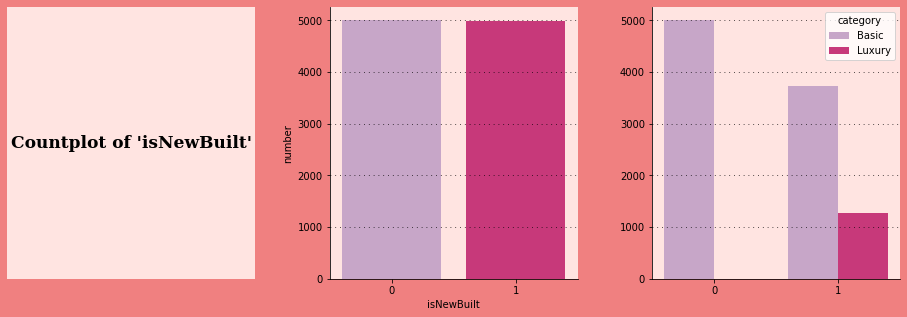

In [ ]:
fig = plt.figure(figsize=(16, 5))  # the figure size
gs = fig.add_gridspec(1, 3)        # making 3 grids (1 row, 3 columns)
gs.update(hspace=0.2, wspace=0.3)  # Changing the wspace would change the width of graphs, and might
                                   # cause them to overlap each other (0.05 for example)
                                   # Similarly for hspace (vertical elongation)

ax0 = fig.add_subplot(gs[0, 0])    # assigning a variable fo each grid
ax1 = fig.add_subplot(gs[0, 1])    # to be able to change each graph independently
ax2 = fig.add_subplot(gs[0, 2])

axes = [ax0, ax1, ax2]             # putting them in a list, to change the graph colour easily
fig.patch.set_facecolor(background_color) # Setting the background colours for the wall behind the graphs
# Title
ax0.text(0.5, 0.5, "Countplot of 'isNewBuilt'",  # determining the coordinates of the title
        horizontalalignment='center',
        verticalalignment='center',                         # determining the alignment
        fontsize=17, fontweight='bold', fontfamily='serif')
# determining the font size, type, weight, and colour

ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Setting the labels (we chose to leave them empty)
ax0.tick_params(left=False, bottom=False)    # Removes the marking points at the axes of a graph
for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
# a for loop that removes the lines enclosing a graph

# Graph1
sns.countplot(x='isNewBuilt', data=housing, ax=ax1, palette='PuRd') # shows numbers of each category
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))


ax1.set_xlabel('isNewBuilt')  # Setting X-label
ax1.set_ylabel('number')   # Setting Y-label
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)

# Graph2
# Drawing the hasYard feature against the category feature
sns.countplot(x='isNewBuilt', data=housing, hue='category', ax=ax2, palette='PuRd')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)

# Settings
for ax in axes:
    ax.set_facecolor(graph_color)


In [ ]:
# A table showing the numbers of basic houses that are newly built, and those that aren't
# and also the luxurious houses that are newly built, and those that aren't
pd.crosstab(housing['category'], housing['isNewBuilt'], margins=True).style.background_gradient(cmap="Blues")

isNewBuilt,0,1,All
category,,,
Basic,5009,3726,8735
Luxury,0,1265,1265
All,5009,4991,10000


We notice that all luxurious apartments must have pools, but not all apartments with pools are luxurious



Now that we have visualized the features with the strongest correlation to category, we will also visualize some other features with weaker correlations, to make sure that the phenomenon we have noticed so far, is not just a mere coincidence

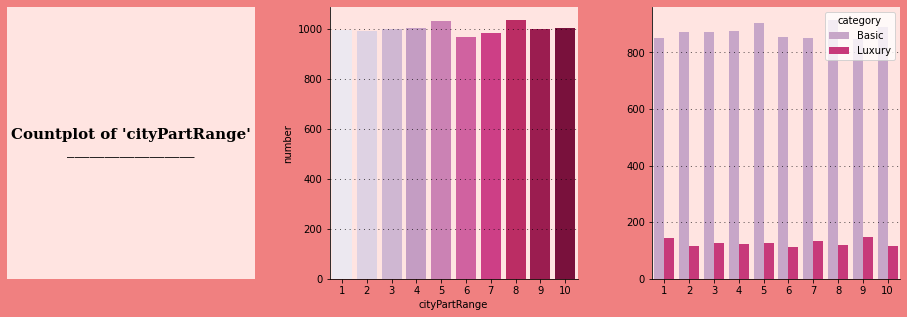

In [ ]:
fig = plt.figure(figsize=(16, 5))  # the figure size
gs = fig.add_gridspec(1, 3)        # making 3 grids (1 row, 3 columns)
gs.update(hspace=0.2, wspace=0.3)  # Changing the wspace would change the width of graphs, and might

ax0 = fig.add_subplot(gs[0, 0])    # assigning a variable fo each grid
ax1 = fig.add_subplot(gs[0, 1])    # to be able to change each graph independently
ax2 = fig.add_subplot(gs[0, 2])

axes = [ax0, ax1, ax2]             # putting them in a list, to change the graph colour easily
fig.patch.set_facecolor(background_color) # Setting the background colours for the wall behind the graphs
# Title
ax0.text(0.5, 0.5, "Countplot of 'cityPartRange'\n_________________",  # determining the coordinates of the title
        horizontalalignment='center',
        verticalalignment='center',                         # determining the alignment
        fontsize=15, fontweight='bold', fontfamily='serif')
# determining the font size, type, weight, and colour

ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Setting the labels (we chose to leave them empty)
ax0.tick_params(left=False, bottom=False)    # Removes the marking points at the axes of a graph
for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
# a for loop that removes the lines enclosing a graph
# Graph1
sns.countplot(x='cityPartRange', data=housing, ax=ax1, palette='PuRd') # shows numbers of each category
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))

ax1.set_xlabel('cityPartRange')  # Setting X-label
ax1.set_ylabel('number')   # Setting Y-label
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)
# Graph2
# Drawing the hasYard feature against the category feature
sns.countplot(x='cityPartRange', data=housing, hue='category', ax=ax2, palette='PuRd')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)

# Settings
for ax in axes:
    ax.set_facecolor(graph_color)

In [ ]:
pd.crosstab(housing['category'], housing['cityPartRange'], margins=True).style.background_gradient(cmap="Blues")

cityPartRange,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,851,874,873,877,905,853,850,915,848,889,8735
Luxury,143,116,126,124,126,112,134,120,149,115,1265
All,994,990,999,1001,1031,965,984,1035,997,1004,10000


we notice that there are luxurious apartments in all city part ranges, unlike the case with pools, yards, and newly built features

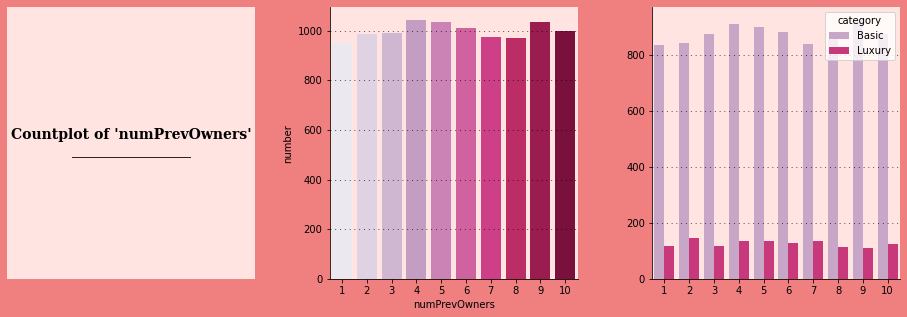

In [ ]:
fig = plt.figure(figsize=(16, 5))  # the figure size
gs = fig.add_gridspec(1, 3)        # making 3 grids (1 row, 3 columns)
gs.update(hspace=0.2, wspace=0.3)  # Changing the wspace would change the width of graphs, and might
ax0 = fig.add_subplot(gs[0, 0])    # assigning a variable fo each grid
ax1 = fig.add_subplot(gs[0, 1])    # to be able to change each graph independently
ax2 = fig.add_subplot(gs[0, 2])

axes = [ax0, ax1, ax2]             # putting them in a list, to change the graph colour easily
fig.patch.set_facecolor(background_color) # Setting the background colours for the wall behind the graphs

# Title
ax0.text(0.5, 0.5, "Countplot of 'numPrevOwners'\n_________________",  # determining the coordinates of the title
        horizontalalignment='center',
        verticalalignment='center',                         # determining the alignment
        fontsize=14, fontweight='bold', fontfamily='serif')
# determining the font size, type, weight, and colour

ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Setting the labels (we chose to leave them empty)
ax0.tick_params(left=False, bottom=False)    # Removes the marking points at the axes of a graph
for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
# Graph1
sns.countplot(x='numPrevOwners', data=housing, ax=ax1, palette='PuRd') # shows numbers of each category
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))

ax1.set_xlabel('numPrevOwners')  # Setting X-label
ax1.set_ylabel('number')   # Setting Y-label
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)
# a for loop that removes the top and right lines enclosing the graph
# Graph2
# Drawing the hasYard feature against the category feature
sns.countplot(x='numPrevOwners', data=housing, hue='category', ax=ax2, palette='PuRd')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)

# Settings
for ax in axes:
    ax.set_facecolor(graph_color)

In [ ]:
pd.crosstab(housing['category'], housing['numPrevOwners'], margins=True).style.background_gradient(cmap="Blues")

numPrevOwners,1,2,3,4,5,6,7,8,9,10,All
category,,,,,,,,,,,
Basic,834,842,874,909,900,882,839,856,925,874,8735
Luxury,118,145,117,134,136,129,135,115,111,125,1265
All,952,987,991,1043,1036,1011,974,971,1036,999,10000


we notice that there are luxurious apartments for all number of previous owners, unlike the case with pools, yards, and newly built features. This confirms our initial speculation

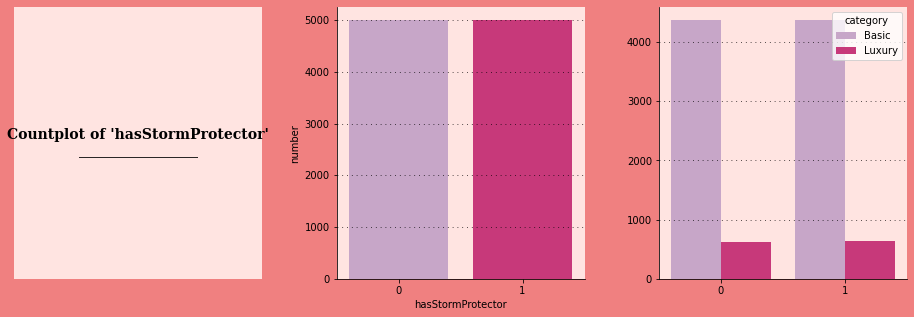

In [ ]:
fig = plt.figure(figsize=(16, 5))  # the figure size
gs = fig.add_gridspec(1, 3)        # making 3 grids (1 row, 3 columns)
gs.update(hspace=0.2, wspace=0.3)  # Changing the wspace would change the width of graphs, and might
                                   # cause them to overlap each other (0.05 for example)
                                   # Similarly for hspace (vertical elongation)

ax0 = fig.add_subplot(gs[0, 0])    # assigning a variable fo each grid
ax1 = fig.add_subplot(gs[0, 1])    # to be able to change each graph independently
ax2 = fig.add_subplot(gs[0, 2])

axes = [ax0, ax1, ax2]             # putting them in a list, to change the graph colour easily
fig.patch.set_facecolor(background_color) # Setting the background colours for the wall behind the graphs

# Title
ax0.text(0.5, 0.5, "Countplot of 'hasStormProtector'\n_________________",  # determining the coordinates of the title
        horizontalalignment='center',
        verticalalignment='center',                         # determining the alignment
        fontsize=14, fontweight='bold', fontfamily='serif')
# determining the font size, type, weight, and colour

ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Setting the labels (we chose to leave them empty)
ax0.tick_params(left=False, bottom=False)    # Removes the marking points at the axes of a graph
for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
# Graph1
sns.countplot(x='hasStormProtector', data=housing, ax=ax1, palette='PuRd') # shows numbers of each category
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))

ax1.set_xlabel('hasStormProtector')  # Setting X-label
ax1.set_ylabel('number')   # Setting Y-label
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)
# a for loop that removes the top and right lines enclosing the graph
# Graph2
# Drawing the hasYard feature against the category feature
sns.countplot(x='hasStormProtector', data=housing, hue='category', ax=ax2, palette='PuRd')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.set_xlabel('')
ax2.set_ylabel('')
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)
# Settings
for ax in axes:
    ax.set_facecolor(graph_color)


In [ ]:
pd.crosstab(housing['category'], housing['hasStormProtector'], margins=True).style.background_gradient(cmap="Blues")

hasStormProtector,0,1,All
category,,,
Basic,4372,4363,8735
Luxury,629,636,1265
All,5001,4999,10000


The same is true here, not all luxurious houses must have a storm protector

In [ ]:
housing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


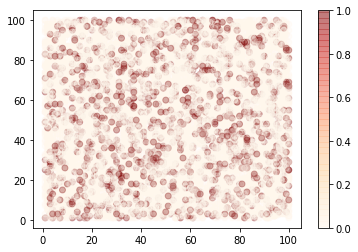

In [ ]:
# Scatter data
plt.scatter(data = df2 , x="numberOfRooms" , y="floors" , c =df2["category"], cmap = 'OrRd', alpha = 0.3)
plt.colorbar ()
plt.show()


Luxurious apartments are distributed almost evenly

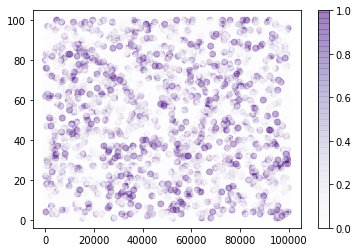

In [ ]:
plt.scatter(data = df2 , x="squareMeters" , y="numberOfRooms" , c =df2["category"], cmap = 'Purples', alpha = 0.3)
plt.colorbar ()
plt.show()


Luxurious apartments are distributed almost evenly


#Data cleaning

In [ ]:
# Checking price against squareMeters
housing['price']/housing['squareMeters']


0       100.089794
1       100.110058
2       100.061784
3       100.029744
4       100.172543
           ...    
9995    102.216628
9996    100.184087
9997    100.070735
9998    100.025527
9999    101.880833
Length: 10000, dtype: float64

The relation between them is that price is almost 100* the square meters

so I will drop one of them

I have decide to drop the price, as I believe it is more logical to assume that people who buy luxurious apartments, would not care as much about the price, but would care more about the size of the apartment

In [ ]:
df2 = df2.drop(["price"], axis = 1)

In [ ]:
# Price has been dropped
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   squareMeters       10000 non-null  int64
 1   numberOfRooms      10000 non-null  int64
 2   hasYard            10000 non-null  int64
 3   hasPool            10000 non-null  int64
 4   floors             10000 non-null  int64
 5   cityCode           10000 non-null  int64
 6   cityPartRange      10000 non-null  int64
 7   numPrevOwners      10000 non-null  int64
 8   made               10000 non-null  int64
 9   isNewBuilt         10000 non-null  int64
 10  hasStormProtector  10000 non-null  int64
 11  basement           10000 non-null  int64
 12  attic              10000 non-null  int64
 13  garage             10000 non-null  int64
 14  hasStorageRoom     10000 non-null  int64
 15  hasGuestRoom       10000 non-null  int64
 16  category           10000 non-null  int64
dtypes: int64(17)


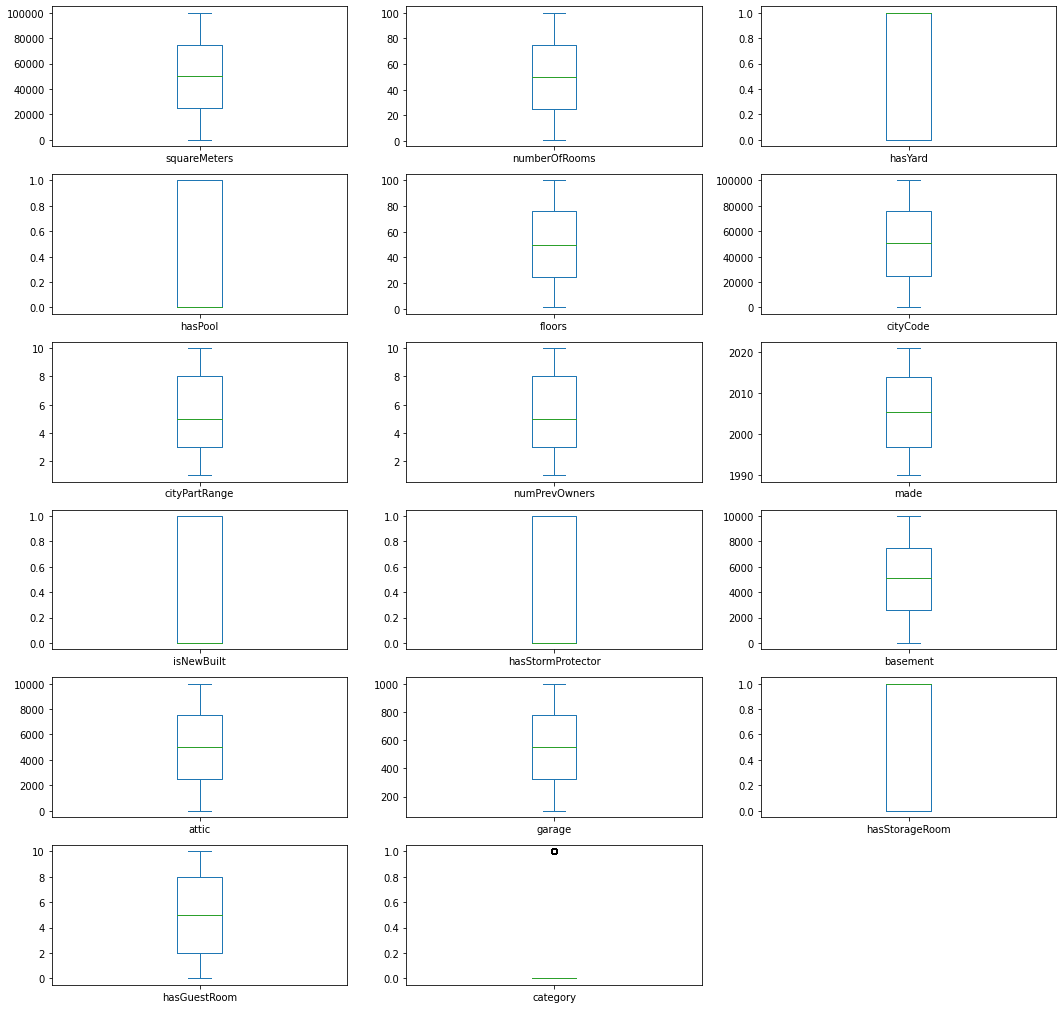

In [ ]:
# Checking outliers
df2.plot(kind = "box" , subplots = True , figsize = (18,18) ,  layout = (6,3))
plt.show()


There are almost no outliers, except in the category. Which makes sense
 since luxurious apartments are a minority (around 12.6% as shown previously)

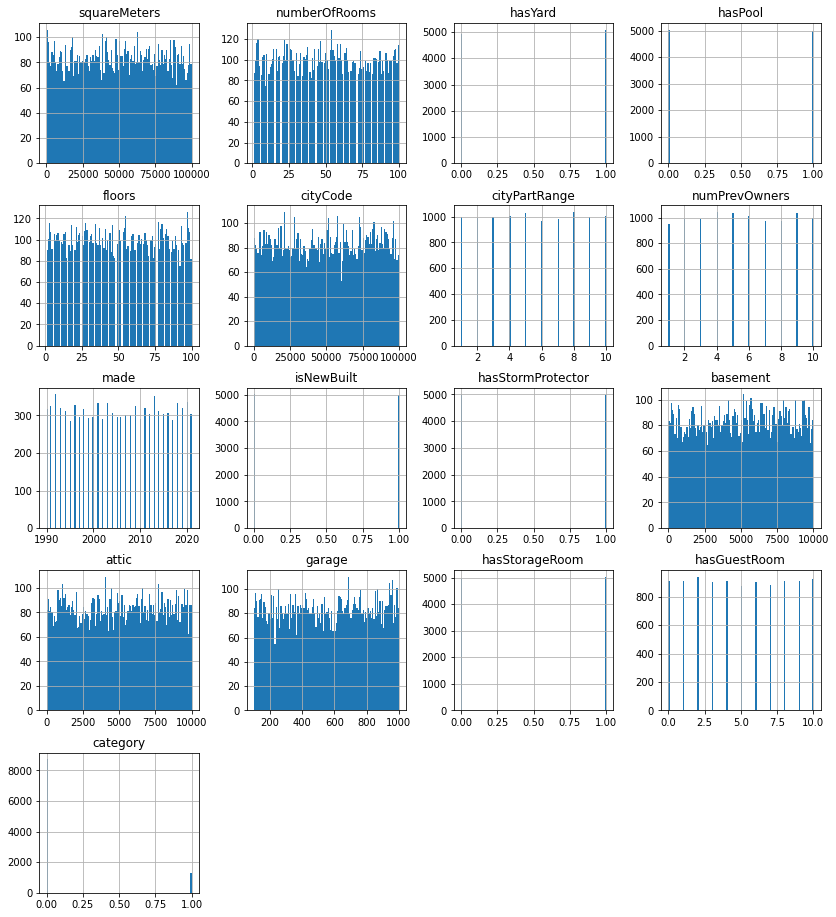

In [ ]:
# histogram
df2.hist(bins=120 , figsize=(14,16))
plt.show()


Data does not appear to show any irregularities

#Training and Testing

#Handling imbalanced data by undersampling the majority class

Now, I am going to maintain the categorical data into equal part luxury and basic

In [ ]:
#taking Luxury and putting the luxury in category
x_equal_lux = df2[df2['category']==1]
x_equal_lux


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,1
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,1
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,1
17,99371,31,1,1,16,96297,7,8,2013,1,1,3258,6296,354,1,8,1
19,41792,43,1,1,10,80768,9,5,2017,1,1,2950,9573,572,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,89549,60,1,1,95,1965,2,4,2006,1,0,5919,2553,543,1,6,1
9947,98554,81,1,1,18,85908,9,10,2007,1,1,744,5486,399,0,8,1
9973,14982,64,1,1,13,96468,7,5,2002,1,0,1073,7110,720,1,10,1
9986,26907,65,1,1,43,3916,8,3,2003,1,0,1276,9010,248,0,4,1


In [ ]:
x_equal_lux.shape

(1265, 17)

In [ ]:
#taking basic
x_equal_basic = df2[df2['category']==0].sample(1265)
x_equal_basic


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
6031,69952,78,0,0,93,75348,1,8,1996,0,1,5595,1882,681,0,7,0
7980,77440,35,0,0,25,17773,7,1,2012,1,0,3420,8216,879,1,6,0
2031,1853,49,0,0,29,55608,1,4,2020,0,1,7001,5455,596,1,8,0
5901,54729,30,1,1,9,20767,3,2,2001,0,1,4763,5709,281,1,6,0
7678,49667,13,1,1,90,6607,6,5,1993,0,1,8626,9607,488,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8878,75340,98,1,1,27,30600,3,5,2018,0,0,4266,6327,387,1,7,0
3736,23262,71,0,0,64,87309,9,8,2018,0,0,8475,2396,640,1,9,0
534,63237,8,1,0,49,23635,3,9,2009,1,1,6344,7812,197,0,5,0
3053,62854,33,0,0,71,96804,1,6,2006,1,0,6993,7510,137,1,10,0


In [ ]:
x_equal_basic.shape

(1265, 17)

I am taking equal data which 1265 both Luxury and basic

In [ ]:
# balancing data
X_equal = [x_equal_basic,x_equal_lux]
balanced_result = pd.concat(X_equal)
balanced_result


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
6031,69952,78,0,0,93,75348,1,8,1996,0,1,5595,1882,681,0,7,0
7980,77440,35,0,0,25,17773,7,1,2012,1,0,3420,8216,879,1,6,0
2031,1853,49,0,0,29,55608,1,4,2020,0,1,7001,5455,596,1,8,0
5901,54729,30,1,1,9,20767,3,2,2001,0,1,4763,5709,281,1,6,0
7678,49667,13,1,1,90,6607,6,5,1993,0,1,8626,9607,488,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,89549,60,1,1,95,1965,2,4,2006,1,0,5919,2553,543,1,6,1
9947,98554,81,1,1,18,85908,9,10,2007,1,1,744,5486,399,0,8,1
9973,14982,64,1,1,13,96468,7,5,2002,1,0,1073,7110,720,1,10,1
9986,26907,65,1,1,43,3916,8,3,2003,1,0,1276,9010,248,0,4,1


In [ ]:
# Balancing category value
balanced_result['category'].value_counts()


0    1265
1    1265
Name: category, dtype: int64

Data has been balanced

In [ ]:
# droping category
X = balanced_result.drop('category',axis=1)
y = balanced_result['category']

#Train and testing data

i am going to use three model that is Logistic Regression, RandomForestClassifier, KNeighborsClassifier to see clear difference
and analyis which model work perfectly according our datasets

With StandardScaler, the mean is removed and each feature/variable is scaled to unit variance.

(value-mean)/std

sklearn provides a class called StandardScaler fot this

**Confusion matrix**

* A confusion matrix is a summary of outcomes results on a classification problem used to describe the performance of a classification model

* There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a luxury house, for example, "yes" would mean they have the luxury house, and "no" would mean they don't have the luxury house.

* “True positive(TP)” for correctly predicted event values.
* “False positive(FP)” for incorrectly predicted event values.
* “True negative(TN)” for correctly predicted no-event values.
* “False negative(FN)” for incorrectly predicted no-event values.

* Accuracy is the ratio of correctly predicted
observation to the total observations.
Accuracy  =   (TP + TN) /  (TP + FP + FN + TN)     
 (TP + FP + FN + TN)  = total

* Precision: When it predicts yes, how often is it correct?

     Precision = TP/predicted yes

     Precision  = TP / (TP + FP)

* A recall is the ratio of correctly predicted positive observations to all observations in actual class – yes

    Recall = TP / (TP + FN)

* F1 Score: This is a weighted average of the true positive rate (recall) and precision.

F1 Score = 2 * ( Precision * Recall ) / (Precision  +  Recall )


In [ ]:
# data spliting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_df = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

* Here i have split data into X_train,X_test,Y_train,Y_test
* data distribution into 30% for test and remaing 70% for train

**Now i am going using the model and see which model works perfectly and give accurate result according oor dataset**

#RandomForestClassifier

A random forest is a meta estimator that uses averaging to increase predicted accuracy and control over-fitting by fitting a number of decision tree classifiers on various sub-samples of the dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_train,Y_train)


1.0

Accuracy is high, but might be due to overfitting

Calculating a confusion matrix to evaluate a classification's accuracy.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, Y_pred)

array([[377,   0],
       [  0, 382]])

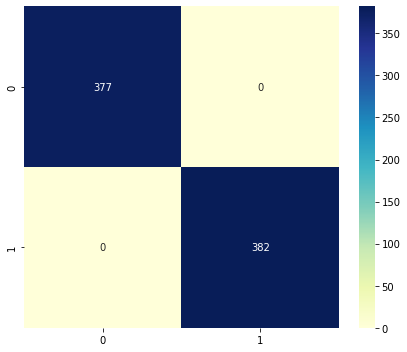

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig= plt.figure(figsize=(6,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()

Same as above, all basic apartments were correctly classified
But here, also luxurious ones were correctly classified
Which means 100% accuracy, with no overfitting


377: Predicted to be Basic, and they really are basic

0 : Predicted to be luxurious, but they are basic

0 : Predicted to be Basic, but they actually are luxurious

382 : Predicted to be luxurious, and they really are luxurious

In [ ]:
rf.score(X_test,Y_test)


1.0

Indeed, 100% accuracy

In [ ]:
categories = ['Basic','Luxurious']
#classification report
print(classification_report(Y_test, Y_pred, target_names=categories))


              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00       377
   Luxurious       1.00      1.00      1.00       382

    accuracy                           1.00       759
   macro avg       1.00      1.00      1.00       759
weighted avg       1.00      1.00      1.00       759



we can see that we got perfect scored this time

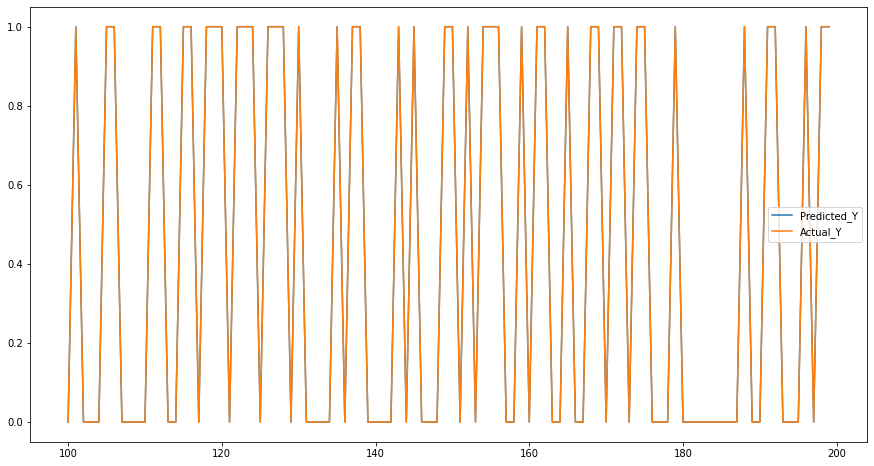

In [ ]:
# ploting Predicted_Y and Actual_Y
Y_pred = rf.predict(X_test)
test = pd.DataFrame({'Predicted_Y':Y_pred, 'Actual_Y':Y_test})
fig = plt.figure(figsize=(15,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[100:200])
plt.legend(['Predicted_Y','Actual_Y'])


All predictions were correct.

#LogisticRegression

Logistic regression is known as method of modeling the probability of a discrete result given an input variable. The most frequent logistic regression models have a binary outcome, which might be true or false, yes or no, etcetera.

Logistic regression is a transformation of a linear regression using the sigmoid function.

F(x) = 1/ 1+e^-(Bo + B1x)

Here Bo + B1x is similar to the linear model y = ax + b. The logistic function applies a sigmoid function to restrict the y value from a large scale to within the range 0–1.

In [ ]:
from sklearn.linear_model import LogisticRegression
cla = LogisticRegression()
cla.fit(X_train, Y_train)
Y_pred = cla.predict(X_test)
cla.score(X_train,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5239977413890458

Accuracy is good but as much not as RandomForestClassifier


Calculating a confusion matrix to evaluate a classification's accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, Y_pred)


array([[206, 171],
       [199, 183]])

all basic apartments and luxurious ones were not correctly classified



In [ ]:
rf.score(X_test,Y_test)

1.0

In [ ]:
categories = ['Basic','Luxurious']
#classification report
print(classification_report(Y_test, Y_pred, target_names=categories))


              precision    recall  f1-score   support

       Basic       0.51      0.55      0.53       377
   Luxurious       0.52      0.48      0.50       382

    accuracy                           0.51       759
   macro avg       0.51      0.51      0.51       759
weighted avg       0.51      0.51      0.51       759



we can got perfect scored this time as compare to RandomForestClassifier

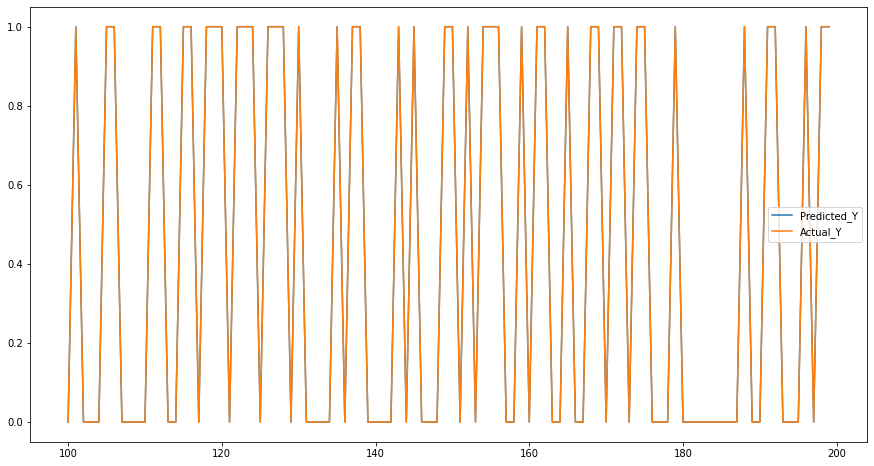

In [ ]:
# ploting Predicted_Y and Actual_Y
Y_pred = rf.predict(X_test)
test = pd.DataFrame({'Predicted_Y':Y_pred, 'Actual_Y':Y_test})
fig = plt.figure(figsize=(15,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[100:200])
plt.legend(['Predicted_Y','Actual_Y'])


All graph were correct eventhough we didn't 100 accuracy


Sklearn. resample is the upsampling/downsampling function in Scikit Learn.

**resample**

One of the ways at which to deal with imbalanced datasets is by resampling with sklearn.resample i.e. upsample dataframes of majority and minority class. it basically creates a random resampling(with/without replacement) of dataset. It works based on the KNearestNeighbours algorithm and i have also used KNearestNeighbours algorithm

In [ ]:
from sklearn.utils import resample
# Create two different dataframes of majority and minority class
df_majority = df2[(df2['category']==0)]
df_minority = df2[(df2['category']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                replace = True,   # sample with replacement
                                n_samples = 7500, # to match majority class
                                random_state =42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled.shape

(16235, 17)

In [ ]:
#counting the value of unsampled category value
df_upsampled['category'].value_counts()

0    8735
1    7500
Name: category, dtype: int64

I take 8735 basic and 7500 luxury house

In [ ]:
X = df_upsampled.drop('category',axis=1)
y = df_upsampled['category']

In [ ]:
scaler = StandardScaler()
std_df = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

* Here i have divided into 30 70%

  30% for test

  70% for test


#KNearestNeighbours algorithm

K-Nearest Neighbours is one of Machine Learning's most basic but crucial categorization algorithms. The KNN algorithm assumes that objects that are similar are close together. To put it another way, related items are close together.

In [ ]:
# using KNearestNeighbours algorithm
from sklearn.neighbors import KNeighborsClassifier
kclf = KNeighborsClassifier(n_neighbors=3 )
kclf.fit(X_train, Y_train)
kclf.score(X_train,Y_train)

0.9087469200985568

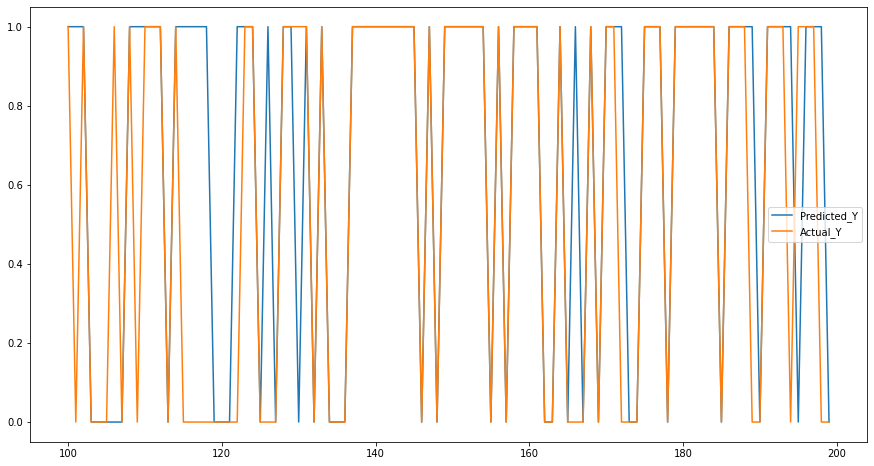

In [ ]:
# ploting Predicted_Y and Actual_Y
Y_pred = kclf.predict(X_test)
test = pd.DataFrame({'Predicted_Y':Y_pred, 'Actual_Y':Y_test})
fig = plt.figure(figsize=(15,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[100:200])
plt.legend(['Predicted_Y','Actual_Y'])

predictions are not correct.

from sklearn.metrics import confusion_matrix, classification_report
 Importing confusion matrix to check accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, Y_pred)

array([[1878,  760],
       [ 129, 2104]])

In [ ]:
kclf.score(X_test,Y_test)

0.8174912748922193

In [ ]:
categories = ['Basic','Luxurious']
print(classification_report(Y_test, Y_pred, target_names=categories))

              precision    recall  f1-score   support

       Basic       0.94      0.71      0.81      2638
   Luxurious       0.73      0.94      0.83      2233

    accuracy                           0.82      4871
   macro avg       0.84      0.83      0.82      4871
weighted avg       0.84      0.82      0.82      4871



90% accuracy

#Comparing results to if the imbalance had not been handled

In [ ]:
X = df2.drop('category',axis=1)
y = df2['category']

In [ ]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_df = scaler.fit_transform(X)
# Scaling the data first

In [ ]:
#from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3 , random_state=42)
# Splitting the data 30-70

#KNeighborsClassifier

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
kclf = KNeighborsClassifier(n_neighbors=10 )
kclf.fit(X_train, Y_train)
kclf.score(X_train,Y_train)

0.8755714285714286

 Not very promising

In [ ]:
kclf.score(X_test,Y_test)

0.8686666666666667

Not a very good score

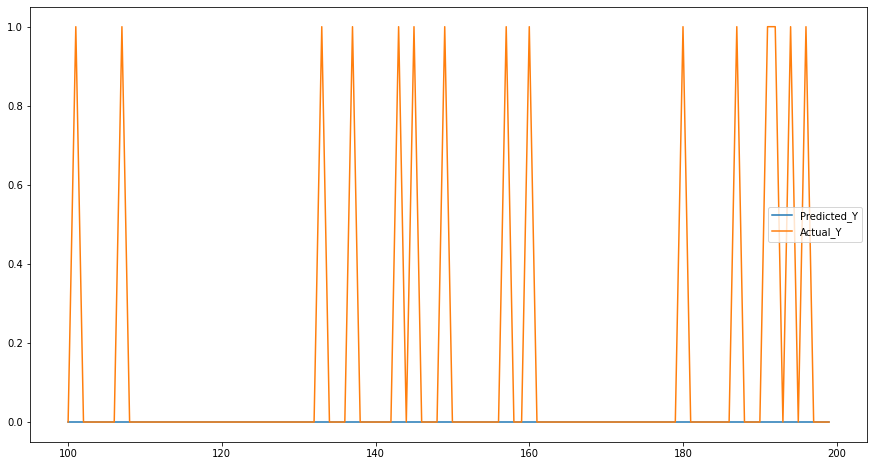

In [ ]:
# ploting Predicted_Y and Actual_Y
Y_pred = kclf.predict(X_test)
test = pd.DataFrame({'Predicted_Y':Y_pred, 'Actual_Y':Y_test})
fig = plt.figure(figsize=(15,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[100:200])
plt.legend(['Predicted_Y','Actual_Y'])


All basic houses were correctly predicted, while all luxurious ones
were incorrectly classified

#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
lr.score(X_train,Y_train)

0.8752857142857143

Almost the same as KNN

In [ ]:
lr.score(X_test,Y_test)

0.8693333333333333

Almost the same as KNN

categories = ['Basic','Luxurious']

from sklearn.metrics import confusion_matrix, classification_report Importing confusion matrix to check accuracy

In [ ]:
#print('Accuracy Score of Logistic Regression : ', accuracy_score(Y_test, Y_pred))
confusion_matrix(Y_test, Y_pred)

array([[2608,    0],
       [ 392,    0]])

All basic category were correctly classified
But luxurious ones were incorrectly classified

2608: Predicted to be Basic, and they really are basic

0 : Predicted to be luxurious, but they are basic

392 : Predicted to be Basic, but they actually are luxurious

0 : Predicted to be luxurious, and they really are luxurious

In [ ]:
print(classification_report(Y_test, Y_pred, target_names=categories))


              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      2608
   Luxurious       0.00      0.00      0.00       392

    accuracy                           0.87      3000
   macro avg       0.43      0.50      0.47      3000
weighted avg       0.76      0.87      0.81      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we can see that Luxurious houses were all incorrectly classified

#RandomForestClassifier

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_train,Y_train)

1.0

Accuracy is high, but might be due to overfitting

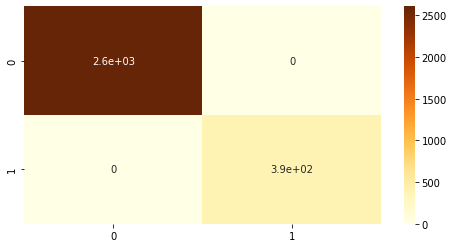

In [ ]:
matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix , annot = True, cmap="YlOrBr")

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[2608,    0],
       [   0,  392]])

* Same as above, all basic apartments were correctly classified
But here, also luxurious ones were correctly classified
Which means 100% accuracy, with no overfitting

In [ ]:
rf.score(X_test,Y_test)


1.0

* Indeed, 100% accuracy

In [ ]:
print(classification_report(Y_test, Y_pred, target_names=categories))


              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2608
   Luxurious       1.00      1.00      1.00       392

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



we can see that we got perfect scored this time

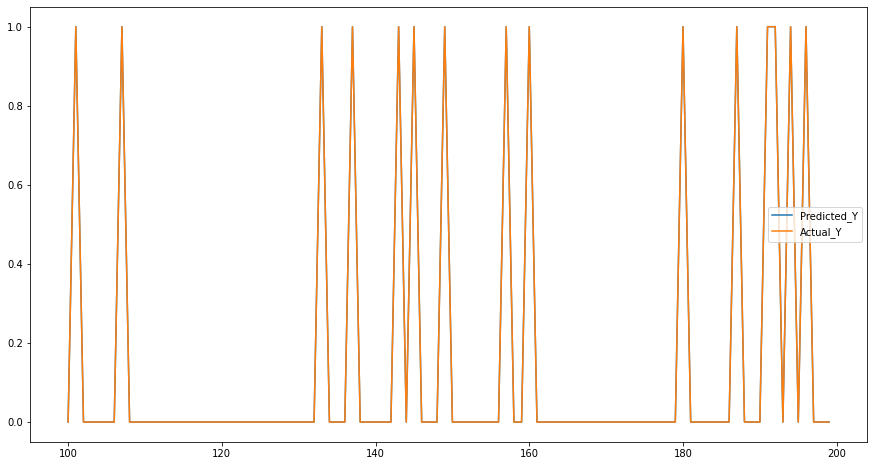

In [ ]:
Y_pred = rf.predict(X_test)
test = pd.DataFrame({'Predicted_Y':Y_pred, 'Actual_Y':Y_test})
fig = plt.figure(figsize=(15,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[100:200])
plt.legend(['Predicted_Y','Actual_Y'])

All predictions were correct.

#AUC-ROC CURVE

AUC stands for the degree or measure of separability, and ROC is a probability curve. It indicates how well the model can distinguish between different classes. The AUC indicates how well the model predicts 0 classes as 0 and 1 courses as 1. The higher the AUC, the better the model can predict 0 classes as 0 and 1 classes as 1.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

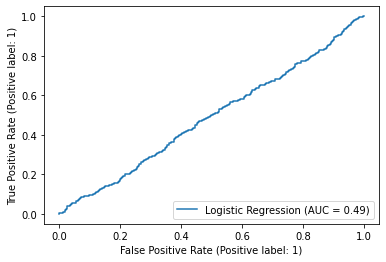

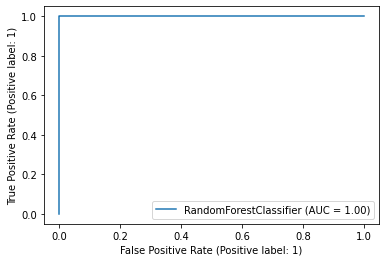

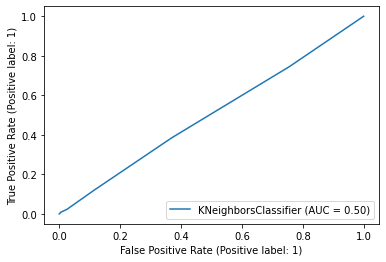

In [ ]:
# Use sklearn to plot ROC curves

from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X_test, Y_test, name = 'Logistic Regression')
plot_roc_curve(rf, X_test, Y_test, name = 'RandomForestClassifier');
plot_roc_curve(kclf, X_test, Y_test, name = 'KNeighborsClassifier');

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Binary class Precision-Recall curve: AP=1.00')

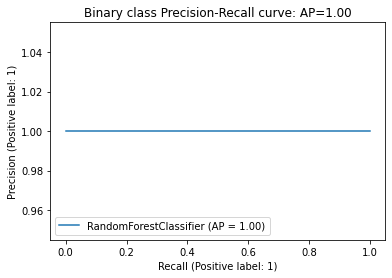

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
average_precision = average_precision_score(Y_test, Y_pred)
print(average_precision)
disp = plot_precision_recall_curve(rf, X_test,Y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

* The higher the AUC, the better the performance of the model at distinguishing between the LUXURY or BASIC classes. In our case also RandomForestClassifier AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class(LUXURY or BASIC classes) points correctly.

* If the AUC is zero, the classifier will predict all Negatives to be Positives and all Positives to be Negatives.

* In KNeighborsClassifier and Logistic Regression  AUC is only 0.49 it mean the classifier is not able to distinguish between Positive and Negative class points (LUXURY or BASIC classes) points . Meaning either the classifier is predicting random class or constant class for all the data points.

* So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

#CONCLUSION

we get know the important feacture variable which  is used to categories the house into luxury or basic

we get 100% accuracy on both train and test data

i have used three model for this project that is Logistic Regression, RandomForestClassifier, KNeighborsClassifier

Out of  Logistic Regression, RandomForestClassifier and KNeighborsClassifier RandomForestClassifier work perfectly